In [1]:
from scipy.interpolate import interp1d
import sys
from parse import *
import yaml
import numpy as np
#import cmath
#import glob
from sympy import * 
from getData import *
import fnmatch
import os
import io
from opticalglass import util
import matplotlib.pyplot as plt

In [2]:
from opticalglass import rindexinfo
from opticalglass.rindexinfo import summary_plots

In [3]:
import requests

# Get a list of all the Yaml files under the database root

In [4]:
db_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database'

In [5]:
os.getcwd()

'/Users/Mike/Developer/PyProjects/opticalglass/notebooks'

In [6]:
os.chdir(db_root)

In [7]:
log = []

# Redirect stderr
class writer(io.TextIOBase):
    def write(self, data):
        log.append(data)
        return len(data)

sys.stderr = writer()

In [8]:
files = []
for root, dirnames, filenames in os.walk(db_root):
    for filename in fnmatch.filter(filenames, '*.yml'):
        files.append(os.path.join(root, filename))

In [9]:
len(files)

2827

In [10]:
files[11]

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C16H14O3)n - polycarbonate/Zhang.yml'

# Survey the Yaml file directory tree

In [11]:
top_level_keys = util.Counter()
data_list_len = util.Counter()
data_types = util.Counter()
data_data_keys = util.Counter()
data_data_keys_dict = dict()
data_type_keys = util.Counter()
data_specs_keys = util.Counter()

In [12]:
num_exceptions = 0
for i, file in enumerate(files):
    try:
        yamlStream=open(file,'r')
        allData=yaml.safe_load(yamlStream)
        for k in allData.keys():
            top_level_keys[k] += 1
        num_ds = len(allData['DATA'])
        allDataData = allData['DATA']
        data_list_len[num_ds] += 1
        for ds in allDataData:
            data_type_keys[ds['type']] += 1
            if not ds['type'] in data_data_keys_dict:
                data_data_keys_dict[ds['type']] = [i]
            else:
                data_data_keys_dict[ds['type']].append(i)
            for k in ds.keys():
                data_data_keys[k] += 1
        if num_ds == 1:
            data_types[allDataData[0]['type']] += 1
        else:
            data_types[(allDataData[0]['type'], allDataData[1]['type'])] += 1
        allDataSpecs = allData['SPECS']
        for k in allDataSpecs.keys():
            data_specs_keys[k] += 1
    except:
        num_exceptions += 1
        pass

In [13]:
top_level_keys

{'REFERENCES': 2826, 'COMMENTS': 2222, 'DATA': 2826, 'SPECS': 2024}

In [14]:
data_list_len

{1: 1226, 2: 1600}

In [15]:
data_data_keys

{'type': 4426, 'wavelength_range': 2016, 'coefficients': 2016, 'data': 2410}

In [16]:
data_type_keys

{'formula 5': 102,
 'formula 2': 515,
 'tabulated nk': 613,
 'formula 3': 1169,
 'tabulated n': 189,
 'tabulated k': 1608,
 'formula 1': 117,
 'formula 4': 86,
 'formula 9': 1,
 'formula 6': 22,
 'formula 8': 3,
 'formula 7': 1}

In [17]:
data_data_keys_dict['tabulated nk'][:20]

[9, 11, 13, 15, 18, 19, 22, 27, 32, 33, 34, 41, 42, 43, 44, 45, 51, 52, 57, 58]

In [69]:
len(data_data_keys_dict)

12

In [19]:
for i in data_data_keys_dict['tabulated nk'][:20]:
    print(f"{i}: {files[i]}")

9: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C2H4)n - polyethylene/Smith.yml
11: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C16H14O3)n - polycarbonate/Zhang.yml
13: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C10H8O4)n - polyethylene terephthalate/Zhang.yml
15: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C8H8 - styrene/Myers.yml
18: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C2H3N - acetonitrile/Myers.yml
19: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C4H8OS - oxathiane/Myers.yml
22: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C6H5NO2 - nitrobenzene/Myers.yml
27: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/CH4O - methanol/Myers.yml
32: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C7H8 - toluene/Myers.yml


In [20]:
files[11]

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C16H14O3)n - polycarbonate/Zhang.yml'

In [21]:
files[15]

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C8H8 - styrene/Myers.yml'

In [22]:
data_types

{'formula 5': 85,
 'formula 2': 103,
 'tabulated nk': 612,
 'formula 3': 15,
 ('tabulated n', 'tabulated k'): 10,
 ('formula 2', 'tabulated k'): 412,
 'tabulated n': 179,
 ('formula 5', 'tabulated nk'): 1,
 'formula 1': 111,
 'formula 4': 85,
 'tabulated k': 9,
 'formula 9': 1,
 ('formula 5', 'tabulated k'): 16,
 'formula 6': 22,
 ('formula 1', 'tabulated k'): 6,
 ('formula 3', 'tabulated k'): 1154,
 'formula 8': 3,
 ('formula 4', 'tabulated k'): 1,
 'formula 7': 1}

In [23]:
data_specs_keys

{'n_absolute': 1895,
 'temperature': 1775,
 'pressure': 45,
 'wavelength_vacuum': 1884,
 'substrate': 98,
 'film_thickness': 78,
 'x': 8,
 'thickness': 8,
 'thermal_dispersion': 1235,
 'nd': 1548,
 'Vd': 1548,
 'glass_code': 1243,
 'glass_status': 830,
 'density': 1494,
 'thermal_expansion': 1493,
 'climatic_resistance': 931,
 'stain_resistance': 336,
 'acid_resistance': 844,
 'dPgF': 1465,
 'phosphate_resistance': 618,
 'alkali_resistance': 166,
 'specific_heat': 5,
 'thermal_conductivity': 5,
 'transition_temperature': 7,
 'Knoop_hardness': 6,
 'fracture_toughness': 5,
 'shear_modulus': 2,
 'Youngs_modulus': 7,
 'Vickers_hardness': 1,
 'direction': 1,
 'deposition_temperature': 7}

# Investigate library yaml file

In [24]:
lib_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/library.yml'

In [25]:
yamlStream = open(lib_root,'r')
shelves = yaml.safe_load(yamlStream)

In [26]:
for shelf in shelves:
    print(f"{shelf['SHELF']}: {shelf['name']}")

main: MAIN - simple inorganic materials
organic: ORGANIC - organic materials
glass: GLASS - glasses
other: OTHER - miscellaneous materials
3d: 3D - selected data for 3D artists


In [27]:
shelves[1].keys()

dict_keys(['SHELF', 'name', 'content'])

In [28]:
shelves[1]['SHELF']

'organic'

In [29]:
shelves[1]['name']

'ORGANIC - organic materials'

In [30]:
shelves[1]['content']

[{'DIVIDER': 'Alkanes'},
 {'BOOK': 'methane',
  'name': 'CH<sub>4</sub> (Methane)',
  'info': 'organic/methane.html',
  'content': [{'DIVIDER': 'Gas'},
   {'PAGE': 'Rollefson',
    'name': 'Rollefson and Havens 1940: Gas at 0 °C; n 1.68-14.8 µm',
    'data': 'organic/CH4 - methane/Rollefson.yml'},
   {'PAGE': 'Loria',
    'name': 'Loria 1909: Gas at 0 °C; n 0.529-0.659 µm',
    'data': 'organic/CH4 - methane/Loria.yml'},
   {'DIVIDER': 'Liquid'},
   {'PAGE': 'Martonchik-liquid-111K',
    'name': 'Martonchik and Orton 1994: Liquid at 111 K; n,k 0.002-71.4 µm',
    'data': 'organic/CH4 - methane/Martonchik-liquid-111K.yml'},
   {'PAGE': 'Martonchik-liquid-90K',
    'name': 'Martonchik and Orton 1994: Liquid at 90 K; n,k 0.002-71.4 µm',
    'data': 'organic/CH4 - methane/Martonchik-liquid-90K.yml'},
   {'DIVIDER': 'Solid'},
   {'PAGE': 'Martonchik-solid-90K',
    'name': 'Martonchik and Orton 1994: Solid at 90 K; n,k 0.002-100 µm',
    'data': 'organic/CH4 - methane/Martonchik-solid-90K.y

In [31]:
len(shelves[1]['content'])

78

In [32]:
shelves[1]['content'][8]['BOOK']

'acetylene'

In [33]:
shelves[1]['content'][8]['content'][0]

{'PAGE': 'Loria',
 'name': 'Loria 1909: Gas at 0 °C; n 0.529-0.659 µm',
 'data': 'organic/C2H2 - acetylene/Loria.yml'}

In [34]:
lamb=1.04
yamlStream=open(files[11],'r')
allData=yaml.safe_load(yamlStream);	

materialData=allData["DATA"][0]

assert materialData["type"]=="tabulated nk"

matLambda=[]
matN=[]
matK=[]
#in this type of material read data line by line
for line in materialData["data"].splitlines():
    parsed=parse("{l:g} {n:g} {k:g}",line)
    try:
        n=parsed["n"]+1j*parsed["k"]
        matLambda.append(parsed["l"]);
        matN.append(parsed["n"])
        matK.append(parsed["k"])
    except TypeError as e:
        sys.stderr.write("TypeError occured:"+str(e)+"\r\n")

matLambda=np.array(matLambda)
matN=np.array(matN)
matK=np.array(matK)

interN=interp1d(matLambda,matN)
interK=interp1d(matLambda,matK)

[ x for x in np.nditer(interN(lamb)+1j*interK(lamb)) ]

[array(1.56916+3.52e-07j)]

In [35]:
matLambda[:61]

array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72,
       0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83,
       0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [36]:
matK[::10]

array([1.12e-05, 2.95e-07, 4.80e-07, 5.22e-08, 6.27e-09, 4.58e-07,
       4.66e-07, 5.78e-07, 1.79e-06, 6.77e-07, 6.30e-06, 2.35e-06,
       4.09e-06, 5.86e-05, 1.46e-05, 3.58e-05, 1.53e-05, 4.15e-05,
       8.06e-05, 2.84e-03, 2.24e-03, 1.62e-03, 1.67e-04, 2.39e-03,
       1.90e-03, 1.84e-03, 2.78e-03, 1.86e-03, 2.33e-03, 5.72e-03,
       1.38e-02, 5.47e-03, 1.55e-03, 1.53e-03, 1.79e-03, 1.85e-03,
       1.80e-03, 2.18e-03, 1.51e-03, 3.99e-03, 2.26e-03, 3.00e-03,
       3.47e-03, 3.19e-03, 4.92e-03, 2.17e-01, 8.74e-03, 5.87e-03,
       6.49e-03, 2.46e-02, 2.04e-02, 2.02e-02, 6.34e-01, 3.50e-01,
       6.42e-02, 1.36e-01, 1.11e-02, 3.20e-02, 3.70e-02, 1.92e-02,
       1.12e-02, 7.56e-02])

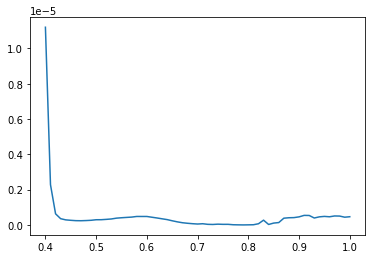

In [37]:
plt.plot(matLambda[:61], matK[:61])

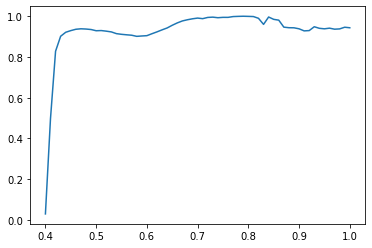

In [38]:
last = 61
thi = 10
t = thi*1.0e3
matT = [np.exp(-4.0*np.pi*t*k/wv) for n,k,wv in zip(matN[:last], matK[:last], matLambda[:last])]
plt.plot(matLambda[:61], matT)

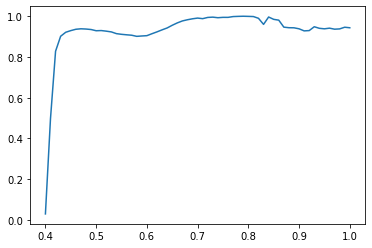

In [39]:
last = 61
thi = 10
t = thi*1.0e3
matT1 = np.exp(-4.0*np.pi*t*matK[:last]/matLambda[:last])
plt.plot(matLambda[:last], matT1)

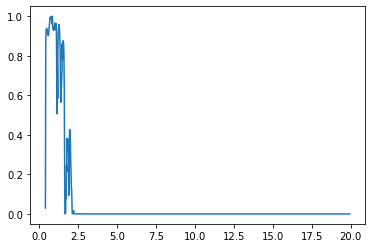

In [40]:
last = 61
thi = 10
t = thi*1.0e3
matT1 = np.exp(-4.0*np.pi*t*matK/matLambda)
plt.plot(matLambda, matT1)

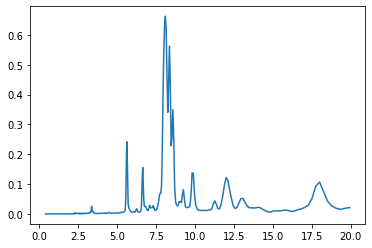

In [41]:
plt.plot(matLambda, matK)

In [42]:
matLambda=[]
matN=[]
matK=[]
materialInputs = materialData["data"].splitlines()
for line in materialInputs:
    parsed=parse("{l:g} {n:g} {k:g}",line)
    matLambda.append(parsed["l"])
    matN.append(parsed["n"])
    matK.append(parsed["k"])


In [43]:
materialInputs[-1]

'19.942 1.62390 2.13E-02'

In [44]:
parsed=parse("{l:g} {n:g} {k:g}",materialInputs[0])

In [45]:
parsed

<Result () {'l': 0.4, 'n': 1.63389, 'k': 1.12e-05}>

In [46]:
parsed["l"]

0.4

## Polycarbonate

In [47]:
polycarb_url = 'https://refractiveindex.info/database/data/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
polycarb_yaml, name, catalog = rindexinfo.read_rii_url(polycarb_url)
polycarb = rindexinfo.create_material(polycarb_yaml, name, catalog)

In [48]:
pcb_d = polycarb.rindex('d')
pcb_F = polycarb.rindex('F')
pcb_C = polycarb.rindex('C')

In [49]:
material_data = polycarb_yaml["DATA"][0]

In [50]:
polycarb_yaml['REFERENCES']

'1) X. Zhang, J. Qiu, X. Li, J. Zhao, L. Liu. Complex refractive indices measurements of polymers in visible and near-infrared bands, <a href="https://doi.org/10.1364/AO.383831"><i>Appl. Opt.</i> <b>59</b>, 2337-2344 (2020)</a> (0.4-2 µm)<br>2) X. Zhang, J. Qiu, J. Zhao, X. Li, L. Liu. Complex refractive indices measurements of polymers in infrared bands, <a href="https://doi.org/10.1016/j.jqsrt.2020.107063"><i>J. Quant. Spectrosc. Radiat. Transf.</i> <b>252</b>, 107063 (2020)</a> (2-20 µm)'

In [51]:
polycarb_yaml['COMMENTS']

'Normal temperature and pressure. Manufacturer: Dedicated Plastic, China.'

In [52]:
polycarb_yaml['SPECS']

{'n_absolute': True, 'wavelength_vacuum': False}

In [53]:
polycarb_yaml['DATA'][0].keys()

dict_keys(['type', 'data'])

## Ohara FPL53

In [54]:
FPL53, name, catalog = rindexinfo.read_rii_url('https://refractiveindex.info/database/data/glass/ohara/FPL53.yml')

In [55]:
material_data = FPL53["DATA"][0]

In [56]:
FPL53['REFERENCES']

'<a href="http://refractiveindex.info/download/data/2017/ohara_2017-11-30.agf">OHARA Zemax catalog 2017-11-30</a> (obtained from <a href="http://www.ohara-inc.co.jp/en/product/optical/list/">http://www.ohara-inc.co.jp</a>)<br>See also <a href="http://refractiveindex.info/download/data/2017/ohara_2017-11-30.pdf">OHARA glass data sheets</a>'

In [57]:
FPL53['COMMENTS']

''

In [58]:
FPL53['DATA']

[{'type': 'formula 3',
  'wavelength_range': '0.334 2.325',
  'coefficients': '2.0531286 -0.0043190085 2 0.0062752442 -2 -9.8512972e-06 -4 1.364971e-05 -6 -8.9037944e-07 -8'},
 {'type': 'tabulated k',
  'data': '0.334 -0.0000E+00\n0.350 -0.0000E+00\n0.365 -0.0000E+00\n0.370 -0.0000E+00\n0.380 -0.0000E+00\n0.390 -0.0000E+00\n0.400 -0.0000E+00\n0.420 -0.0000E+00\n0.460 -0.0000E+00\n0.500 -0.0000E+00\n0.660 -0.0000E+00\n1.060 -0.0000E+00\n1.529 -0.0000E+00\n2.325 -0.0000E+00\n'}]

In [59]:
FPL53['DATA'][0]

{'type': 'formula 3',
 'wavelength_range': '0.334 2.325',
 'coefficients': '2.0531286 -0.0043190085 2 0.0062752442 -2 -9.8512972e-06 -4 1.364971e-05 -6 -8.9037944e-07 -8'}

In [60]:
FPL53['SPECS']

{'n_absolute': False,
 'wavelength_vacuum': False,
 'temperature': '25.0 Â°C',
 'nd': 1.43875,
 'Vd': 94.960437,
 'glass_code': 439950,
 'glass_status': 'preferred'}

In [61]:
FPL53['DATA'][0].keys()

dict_keys(['type', 'wavelength_range', 'coefficients'])

## CaF2

In [62]:
caf2, name, catalog = rindexinfo.read_rii_url('https://refractiveindex.info/database/data/main/CaF2/Daimon-20.yml')

In [63]:
caf2

{'REFERENCES': 'M. Daimon and A. Masumura. High-accuracy measurements of the refractive index and its temperature coefficient of calcium fluoride in a wide wavelength range from 138 to 2326 nm, <a href="https://doi.org/10.1364/AO.41.005275"><i>Appl. Opt.</i> <b>41</b>, 5275-5281 (2002)</a>',
 'COMMENTS': '20 Â°C, Nitrogen atmosphere',
 'DATA': [{'type': 'formula 2',
   'wavelength_range': '0.138 2.326',
   'coefficients': '0 0.443749998 0.00178027854 0.444930066 0.00788536061 0.150133991 0.0124119491 8.85319946 2752.28175'}]}

## SiO2

In [64]:
sio2, name, catalog = rindexinfo.read_rii_url('https://refractiveindex.info/database/data/main/SiO2/Malitson.yml')

In [65]:
sio2

{'REFERENCES': '1) I. H. Malitson. Interspecimen comparison of the refractive index of fused silica, <a href="https://doi.org/10.1364/JOSA.55.001205"><i>J. Opt. Soc. Am.</i> <b>55</b>, 1205-1208 (1965)</a><br>2) C. Z. Tan. Determination of refractive index of silica glass for infrared wavelengths by IR spectroscopy, <a href="https://doi.org/10.1016/S0022-3093(97)00438-9"><i>J. Non-Cryst. Solids</i> <b>223</b>, 158-163 (1998)</a><br> <sup>*</sup> Sellmeier formula is reported in Ref. 1 for the 0.21-3.71 μm wavelength range. Ref. 2 verifies the validity of the formula up to 6.7 μm.',
 'COMMENTS': 'Fused silica, 20 °C',
 'DATA': [{'type': 'formula 1',
   'wavelength_range': '0.21 6.7',
   'coefficients': '0 0.6961663 0.0684043 0.4079426 0.1162414 0.8974794 9.896161'}],
 'SPECS': {'n_absolute': False,
  'wavelength_vacuum': False,
  'temperature': '20 °C'}}

## Germanium

In [66]:
ge, name, catalog = rindexinfo.read_rii_url('https://refractiveindex.info/database/data/main/Ge/Amotchkina.yml')
ge

{'REFERENCES': 'T. Amotchkina, M. Trubetskov, D. Hahner, V. Pervak, Characterization of e-beam evaporated Ge, YbF<sub>3</sub>, ZnS, and LaF<sub>3</sub> thin films for laser-oriented coatings, <a href="https://doi.org/10.1364/AO.59.000A40"><i>Appl. Opt.</i> <b>59</b>, A40-A47 (2020)</a> (Data kindly provided by Tatiana Amotchkina [<a href="https://refractiveindex.info/download/data/2020/Amotchkina/Ge_substrate_nk.xlsx">data</a>] [<a href="https://refractiveindex.info/download/data/2020/Amotchkina/Summary_for_RefractiveIndexINFO.pdf">description</a>])',
 'DATA': [{'type': 'tabulated nk',
   'data': '0.40000 3.00000 2.51940\n0.40939 3.00000 2.48531\n0.41879 3.00000 2.45739\n0.42818 3.00000 2.44187\n0.43757 3.00000 2.44144\n0.44696 3.00000 2.45499\n0.45636 3.00000 2.47903\n0.46575 3.00000 2.50990\n0.47514 3.00000 2.54540\n0.48454 3.00000 2.58601\n0.49393 3.00000 2.63387\n0.50332 3.00001 2.68749\n0.51271 3.00025 2.74385\n0.52211 3.00107 2.79707\n0.53150 3.00274 2.83995\n0.54089 3.00549 2.86

In [67]:
material_type = ge['DATA'][0]['type']

In [68]:
material_type.split()[1]

'nk'